# **S05: EXERCISES**

## Exercise 1

Let's $x$ be a data vector containing a set of N houses with some information relative to them: its area (in sq. feet).

Also let's $y$ be a vector of size N with the price relative to each house in $x$.

If we represent the total area of each house versus the price, we see that there is a linear trend. The bigger the house, the more expensive it is. Given this intuition, we want to build a model to estimate the price of a new house give its area.

To achieve this goal we're going to build a linear regression model from scratch using bare matrix multiplication operations. A linear regression model it's built with the following formula:
$$y=wX^T$$

where $X$ is the data matrix, $y$ is the price vector and $w$ contains the weights of the linear regression model. Given this, we know $x$ and $y$ so we must calculate $w$ given the following formula.

$$w = (X^TX)^{-1}X^Ty$$

Follow this instructions:
 1. Load both `x` and `y` from _data/x1d.npy_ and _data/y.npy_ using the `numpy.load` function
 1. Use the function `plot_data()` to represent data in a scatter plot
 1. Calculate the weights for the linear regression
     1. Add a bias term to `x` with the provided function `add_bias`. Store the result in `X` (upper)
     1. Calculate `w` using the formula $w = (X^TX)^{-1}X^Ty$
 1. Use the function `plot_data_w_model()` to represent data and the trained linear regression model
 1. Create a new function called `guess_price` that, given an area (in sq. ft.) it returns the estimated price. What price would have a house with 13478 sq. feet.

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def plot_data(X, y):
    f,ax = plt.subplots(figsize=(15,5), sharey=True)
    ax.scatter(x=x, y=y)
    ax.set_title("Sale Price -vs- Area")
    ax.set_xlabel("Area (sq. feet)")
    ax.set_ylabel("Sale Price ($)")
    ax.grid()

def plot_data_w_model(X, y, w):
    y_new = w.dot(X.T)
    f,ax = plt.subplots(ncols=2, figsize=(20,5), sharey=True)
    ax[0].scatter(x=X[:,1], y=y)
    ax[1].scatter(x=X[:,1], y=y)
    ax[1].plot(X[:,1], y_new, c="orange", lw=4)
    ax[0].set_title("Sale Price -vs- Area")
    ax[1].set_title("Estimated LR Model")
    ax[0].set_xlabel("Area (sq. feet)")
    ax[1].set_xlabel("Area (sq. feet)")
    ax[0].set_ylabel("Sale Price ($)")
    ax[0].grid(); ax[1].grid()
    
def add_bias(X):
    return np.c_[np.ones(len(X)),X]

In [13]:
# Load data
x = np.load('data/x1d.npy')
y = np.load('data/y.npy')

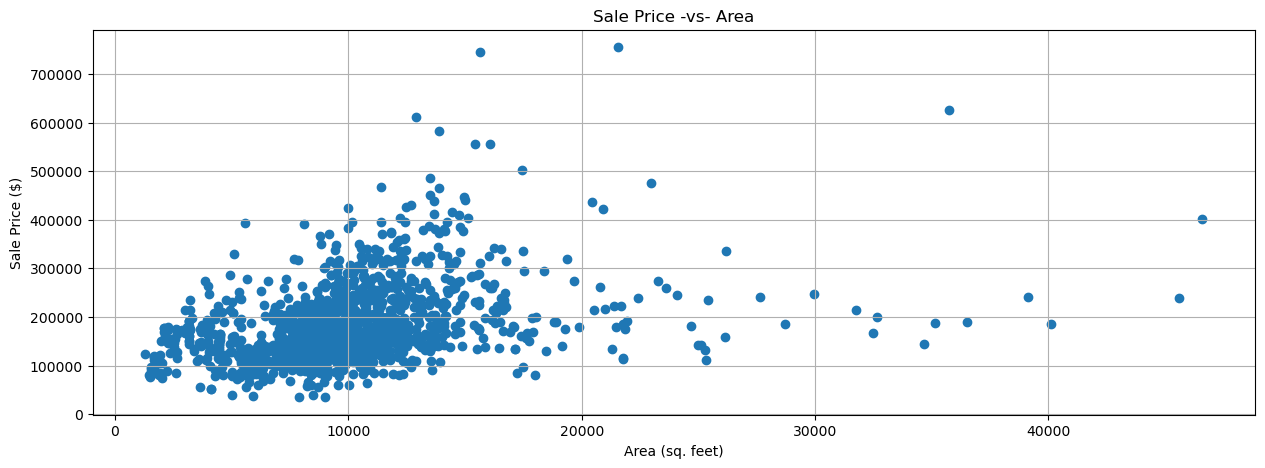

In [14]:
# Plot the original data
plot_data(x, y)

In [15]:
# Add bias term to x
X = add_bias(x)

# Calculate weights for linear regression
w = np.linalg.inv(X.T.dot (X)).dot(X.T).dot(y)

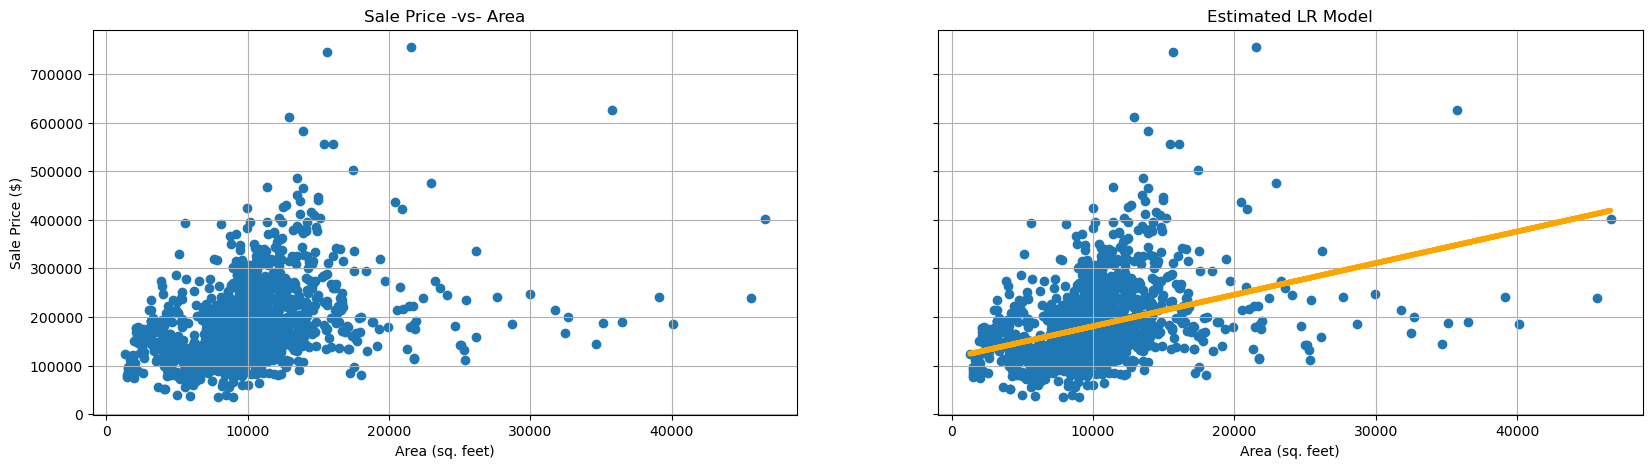

In [16]:
# Plot data along with the trained linear regression model
plot_data_w_model(X, y, w)

In [17]:
# Guess the price for a house with 13478 sq. feet
def guess_price(area, w):
    # Add bias term to the input area
    x_new = add_bias(np.array([[area]]))
    # Use the linear regression model to predict the price
    price = x_new.dot(w)
    return price[0]

# Guess the price for a house with 13478 sq. feet
estimated_price = guess_price(13478, w)
print(f"The estimated price for a house with 13478 sq. feet is ${estimated_price:.2f}")

The estimated price for a house with 13478 sq. feet is $203554.99
